# REGRESION LINEAL Y POLINOMIAL

In [29]:
# Cargamos las librerias
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [30]:
# Cargamos el dataset de la libreria sklearn
# housing.data: Contiene las características del dataset (sin los valores objetivo).
# housing.target: Contiene la variable objetivo, que en este caso es el valor medio de las casas en cada zona (o "MedHouseVal").
# housing.feature_names: Los nombres de las características, que serán las columnas del DataFrame.
diabetes = load_diabetes()
diabetesDataFrame = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetesDataFrame["Response"] = diabetes.target
diabetesDataFrame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Response
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<Axes: >

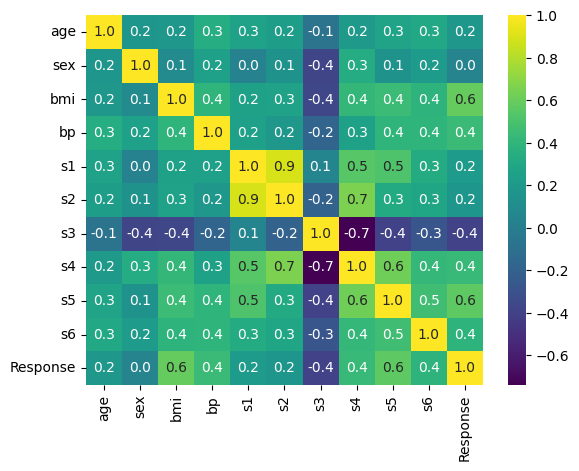

In [31]:
import seaborn as sns

# Graficamos un heatmap de correlación de columnas
sns.heatmap(housingDataFrame.corr(), annot= True, cmap= 'viridis', fmt= '.1f')
# cmap - rocket_r, viridis, magma, crest

In [32]:
#Aqui elegiremos 2 campos: Mediana de ingreso en la cuadra, y cantidad promedio de habitaciones por habitantes.
X = diabetesDataFrame[['bmi', 's5']]
Y = diabetesDataFrame['Response']

Aqui vamos a dividir los datos en Train y Test y entrenaremos un regresor lineal para obtener lo mejor que pueda una predicción sobre el precio

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.6, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(176, 2)
(266, 2)
(176,)
(266,)


### Entrenamiento y predicciones:
Trataremos de predecir que tal funciona el regresor lineal.

In [34]:
# Entrenamos el modelo
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [35]:
# Con el modelo entrenado vamos a hacer predicciones usando los datos de entrenamiento
# y los datos de prueba que son desconocidos para el modelo
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =3162.5509392574972
Pruebas: MSE =3250.616033954256


### Predicciones:
Ahora, veamos que tal predijo nuestro modelo poniendo lado a lado las predicciones y los valores reales

In [36]:
df_predicciones = pd.DataFrame({'valor_real':Y_test,
                                'prediccion':y_test_predict,
                                'diferencia': Y_test - y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion,diferencia
0,281.0,177.645524,103.354476
1,332.0,227.290170,104.709830
2,178.0,131.478157,46.521843
3,155.0,137.086302,17.913698
4,137.0,213.119500,-76.119500
5,65.0,124.858563,-59.858563
6,31.0,110.520400,-79.520400
7,275.0,227.978397,47.021603
8,138.0,168.288221,-30.288221
9,173.0,227.353930,-54.353930


### Ejemplo de polinomio de grado 2
Ahora probaremos con un polinomio de grado 2

In [40]:
# Instanciamos un modelo para hacerlo polinómico
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=4)     # Definimos el grado del polinomio

# Transformamos los datos para poder entrenar el modelo
Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

# Entrenamos el modelo lineal con los datos transformados para que sea polinómico
poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

# Calculo de errores
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

# Comparacion de valores
df_predicciones = pd.DataFrame({'valor_real':Y_test,
                                'prediccion':y_test_predict,
                                'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =2916.067980897935
Pruebas: MSE =3405.525166506255


,valor_real,prediccion,diferencia
0,281.0,181.956188,99.043812
1,332.0,233.967630,98.032370
2,178.0,141.292495,36.707505
3,155.0,130.364454,24.635546
4,137.0,214.640445,-77.640445
5,65.0,116.489799,-51.489799
6,31.0,101.453511,-70.453511
7,275.0,232.990567,42.009433
8,138.0,172.596515,-34.596515
9,173.0,223.778617,-50.778617
